<a href="https://colab.research.google.com/github/KseniaAleshchenko14042000/MTPPRvTZ/blob/main/%D0%9C%D0%A2%D0%9F%D0%9F%D0%A0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача
На мелком предприятии пять рабочих. Нужно каждого закрепить за работой одного из семи участков предприятия. Известны стоимости выполнения каждым рабочим определенного участка и количество выполненной нормы с 1 любого участка. Необходимо составить план работ на предприятии так, чтобы все участки были заняты, т.е. все работы были выполнены. При условии, что каждый рабочий загружен лишь на одном участке. Стоимость работ должна быть минимальной, количество выполненной нормы максимальной.

Вводим начальные данные по стоимости и норме выработки

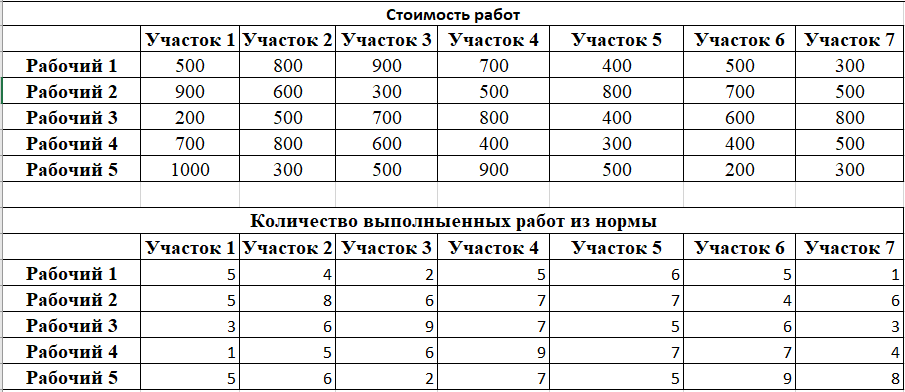

# **ЧАСТЬ 1**

Установка библиотеки Венгерский метод

In [ ]:
pip install hungarian-algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ипорт венгерского алгоритма и импорт библиотеки numpy для работы с матрицами

In [ ]:
import numpy as np
from hungarian_algorithm import algorithm

Создаём массивы данных

In [ ]:
tab1=[[500,800,900,700,400,500,300],[900,600,300,500,800,700,500],[200,500,700,800,400,600,800],[700,800,600,400,300,400,500],[1000,300,500,900,500,200,300],[600,500,400,400,700,800,900],[1000,900,700,300,400,100,500]]
tab1

[[500, 800, 900, 700, 400, 500, 300],
 [900, 600, 300, 500, 800, 700, 500],
 [200, 500, 700, 800, 400, 600, 800],
 [700, 800, 600, 400, 300, 400, 500],
 [1000, 300, 500, 900, 500, 200, 300],
 [600, 500, 400, 400, 700, 800, 900],
 [1000, 900, 700, 300, 400, 100, 500]]

Указанную таблицу по максимуму нужно нормировать к минимуму, переводим вид (грубо говоря инвертируем)

In [ ]:
tab2=[[5,6,8,5,4,5,9],[5,2,4,3,3,6,4],[7,4,1,3,5,4,7],[9,5,4,1,3,3,6],[5,4,8,3,5,1,2],[8,4,4,2,1,9,8],[7,5,3,2,1,8,9]]
tab2

[[5, 6, 8, 5, 4, 5, 9],
 [5, 2, 4, 3, 3, 6, 4],
 [7, 4, 1, 3, 5, 4, 7],
 [9, 5, 4, 1, 3, 3, 6],
 [5, 4, 8, 3, 5, 1, 2],
 [8, 4, 4, 2, 1, 9, 8],
 [7, 5, 3, 2, 1, 8, 9]]

ищем суммы каждого столбца

In [ ]:
sum1= list(map(sum,zip(*tab1)))
sum1

[4900, 4400, 4100, 4000, 3500, 3300, 3800]

In [ ]:
sum2 = list(map(sum,zip(*tab2)))
sum2

[46, 30, 32, 19, 22, 36, 45]

Оптимизируем таблицы

In [ ]:
for i in range(len(tab1)):
  for j in range(len(tab1)):
    tab1[j][i]=float(tab1[j][i])/float(sum1[i])
print(np.copy(tab1))

[[0.10204082 0.18181818 0.2195122  0.175      0.11428571 0.15151515
  0.07894737]
 [0.18367347 0.13636364 0.07317073 0.125      0.22857143 0.21212121
  0.13157895]
 [0.04081633 0.11363636 0.17073171 0.2        0.11428571 0.18181818
  0.21052632]
 [0.14285714 0.18181818 0.14634146 0.1        0.08571429 0.12121212
  0.13157895]
 [0.20408163 0.06818182 0.12195122 0.225      0.14285714 0.06060606
  0.07894737]
 [0.12244898 0.11363636 0.09756098 0.1        0.2        0.24242424
  0.23684211]
 [0.20408163 0.20454545 0.17073171 0.075      0.11428571 0.03030303
  0.13157895]]


In [ ]:
for i in range(len(tab1)):
  for j in range(len(tab1)):
    tab2[j][i]=float(tab2[j][i])/float(sum2[i])
print(np.copy(tab2))

[[0.10869565 0.2        0.25       0.26315789 0.18181818 0.13888889
  0.2       ]
 [0.10869565 0.06666667 0.125      0.15789474 0.13636364 0.16666667
  0.08888889]
 [0.15217391 0.13333333 0.03125    0.15789474 0.22727273 0.11111111
  0.15555556]
 [0.19565217 0.16666667 0.125      0.05263158 0.13636364 0.08333333
  0.13333333]
 [0.10869565 0.13333333 0.25       0.15789474 0.22727273 0.02777778
  0.04444444]
 [0.17391304 0.13333333 0.125      0.10526316 0.04545455 0.25
  0.17777778]
 [0.15217391 0.16666667 0.09375    0.10526316 0.04545455 0.22222222
  0.2       ]]


создаём таблицу с общими критериями

In [ ]:
tab3=tab1
for i in range(len(tab1)):
  for j in range(len(tab1)):
    tab3[i][j]=(tab1[i][j]+tab2[i][j])/2

print(np.copy(tab3))


[[0.10536823 0.19090909 0.2347561  0.21907895 0.14805195 0.14520202
  0.13947368]
 [0.14618456 0.10151515 0.09908537 0.14144737 0.18246753 0.18939394
  0.11023392]
 [0.09649512 0.12348485 0.10099085 0.17894737 0.17077922 0.14646465
  0.18304094]
 [0.16925466 0.17424242 0.13567073 0.07631579 0.11103896 0.10227273
  0.13245614]
 [0.15638864 0.10075758 0.18597561 0.19144737 0.18506494 0.04419192
  0.06169591]
 [0.14818101 0.12348485 0.11128049 0.10263158 0.12272727 0.24621212
  0.20730994]
 [0.17812777 0.18560606 0.13224085 0.09013158 0.07987013 0.12626263
  0.16578947]]


Подготавливаем данные для библиотеки венгерского метода, нормализация не требуется, берём исходные таблицы

Таблица с двумя критериями

In [ ]:
tab6={
'empl1':{'uchastok1':0.10536823, 'uchastok2':0.19090909, 'uchastok3':0.2347561, 'uchastok4':0.21907895, 'uchastok5':0.14805195, 'uchastok6':0.14520202, 'uchastok7':0.13947368},
'empl2':{'uchastok1':0.14618456, 'uchastok2':0.10151515, 'uchastok3':0.09908537, 'uchastok4':0.14144737, 'uchastok5':0.18246753, 'uchastok6':0.18939394, 'uchastok7':0.11023392},
'empl3':{'uchastok1':0.09649512, 'uchastok2':0.12348485, 'uchastok3':0.10099085, 'uchastok4':0.17894737, 'uchastok5':0.17077922, 'uchastok6':0.14646465, 'uchastok7':0.18304094},
'empl4':{'uchastok1':0.16925466,  'uchastok2':0.17424242, 'uchastok3':0.13567073,  'uchastok4':0.07631579, 'uchastok5':0.11103896, 'uchastok6':0.10227273, 'uchastok7':0.13245614},
'empl5':{'uchastok1':0.15638864, 'uchastok2':0.10075758, 'uchastok3':0.18597561,  'uchastok4':0.19144737, 'uchastok5':0.18506494, 'uchastok6':0.04419192, 'uchastok7':0.06169591},
'fake1':{'uchastok1':0.14818101, 'uchastok2':0.12348485, 'uchastok3':0.11128049, 'uchastok4':0.10263158, 'uchastok5':0.12272727, 'uchastok6':0.24621212, 'uchastok7':0.20730994},
'fake2':{'uchastok1':0.17812777, 'uchastok2':0.18560606, 'uchastok3':0.13224085, 'uchastok4':0.09013158, 'uchastok5':0.07987013, 'uchastok6':0.12626263, 'uchastok7':0.16578947},
}

Таблица по 1 критерию

In [ ]:
tab4 = {
 'empl1': { 'uchastok1': 500, 'uchastok2': 800, 'uchastok3': 900, 'uchastok4': 700, 'uchastok5': 400, 'uchastok6': 500, 'uchastok7': 300},
 'empl2': { 'uchastok1': 900, 'uchastok2': 600, 'uchastok3': 300, 'uchastok4': 500, 'uchastok5': 800, 'uchastok6': 700, 'uchastok7': 500},
 'empl3': { 'uchastok1': 200, 'uchastok2': 500, 'uchastok3': 700, 'uchastok4': 800, 'uchastok5': 400, 'uchastok6': 600, 'uchastok7': 800},
 'empl4': { 'uchastok1': 700, 'uchastok2': 800, 'uchastok3': 600, 'uchastok4': 400, 'uchastok5': 300, 'uchastok6': 400, 'uchastok7': 500},
 'empl5': { 'uchastok1': 1000, 'uchastok2': 300, 'uchastok3': 500, 'uchastok4': 900, 'uchastok5': 500, 'uchastok6': 200, 'uchastok7': 300},
 'fake1': { 'uchastok1': 600, 'uchastok2': 500, 'uchastok3': 400, 'uchastok4': 400, 'uchastok5': 700, 'uchastok6': 800, 'uchastok7': 900},
 'fake2': { 'uchastok1': 1000, 'uchastok2': 900, 'uchastok3': 700, 'uchastok4': 300, 'uchastok5': 400, 'uchastok6': 100, 'uchastok7': 500},
}

Таблица по 2 критерию

In [ ]:
tab5 = {
 'empl1': { 'uchastok1': 5, 'uchastok2': 4, 'uchastok3': 2, 'uchastok4': 5, 'uchastok5': 6, 'uchastok6': 5, 'uchastok7': 1},
 'empl2': { 'uchastok1': 5, 'uchastok2': 8, 'uchastok3': 6, 'uchastok4': 7, 'uchastok5': 7, 'uchastok6': 4, 'uchastok7': 6},
 'empl3': { 'uchastok1': 3, 'uchastok2': 6, 'uchastok3': 9, 'uchastok4': 7, 'uchastok5': 5, 'uchastok6': 6, 'uchastok7': 3},
 'empl4': { 'uchastok1': 1, 'uchastok2': 5, 'uchastok3': 6, 'uchastok4': 9, 'uchastok5': 7, 'uchastok6': 7, 'uchastok7': 4},
 'empl5': { 'uchastok1': 5, 'uchastok2': 6, 'uchastok3': 2, 'uchastok4': 7, 'uchastok5': 5, 'uchastok6': 9, 'uchastok7': 8},
 'fake1': { 'uchastok1': 2, 'uchastok2': 6, 'uchastok3': 6, 'uchastok4': 8, 'uchastok5': 9, 'uchastok6': 1, 'uchastok7': 2},
 'fake2': { 'uchastok1': 3, 'uchastok2': 5, 'uchastok3': 7, 'uchastok4': 8, 'uchastok5': 10, 'uchastok6': 2, 'uchastok7': 1},
}

Алгоритм поиска решения по минимуму для 1 таблицы

In [ ]:
algorithm.find_matching(tab4, matching_type = 'min', return_type = 'list' )

[(('empl2', 'uchastok3'), 300),
 (('empl4', 'uchastok5'), 300),
 (('fake2', 'uchastok6'), 100),
 (('empl1', 'uchastok7'), 300),
 (('empl3', 'uchastok1'), 200),
 (('fake1', 'uchastok4'), 400),
 (('empl5', 'uchastok2'), 300)]

Алгоритм поиска решения по максимуму для 2 таблицы

In [ ]:
algorithm.find_matching(tab5, matching_type = 'max', return_type = 'list' )

[(('empl4', 'uchastok6'), 7),
 (('empl3', 'uchastok3'), 9),
 (('empl5', 'uchastok7'), 8),
 (('empl2', 'uchastok2'), 8),
 (('empl1', 'uchastok1'), 5),
 (('fake1', 'uchastok4'), 8),
 (('fake2', 'uchastok5'), 10)]

Алгоритм поиска решения по таблице из двух критериев

In [ ]:
algorithm.find_matching(tab6, matching_type = 'min', return_type = 'list' )

[(('empl4', 'uchastok4'), 0.07631579),
 (('empl2', 'uchastok7'), 0.11023392),
 (('fake2', 'uchastok5'), 0.07987013),
 (('fake1', 'uchastok2'), 0.12348485),
 (('empl3', 'uchastok3'), 0.10099085),
 (('empl1', 'uchastok1'), 0.10536823),
 (('empl5', 'uchastok6'), 0.04419192)]

C помощью алгоритма установлено, что лучшие варианты:

Рабочий 1 на 1 участке

Рабочий 2 на 7 участке

Рабочий 3 на 3 участке

Рабочий 4 на 4 участке

Рабочий 5 на 6 участке

Несуществующий Рабочий 1 на участке 2

Несуществующий Рабочий 2 на участке 5

Так как 2х рабочих не существует, придётся попросить некоторых работать на двух участках

Для этого проведём анализ, аналогичный вышеуказаному для участков 2 и 5

# **ЧАСТЬ 2**

Для кажой таблицы добавим несуществующие участки

Таблица по 1 критерию (Каждый рабочий стоимость по второму участку и по пятому [uc2,uc5])

In [ ]:
tab2_1=[[800,400],[600,800],[500,400],[800,300],[300,500]]
tab2_1

[[800, 400], [600, 800], [500, 400], [800, 300], [300, 500]]

Таблица по 2 критерию (Каждый рабочий выработка по второму участку и по пятому [uc2,uc5]) + сразу же нормализуем аналогично началу выполнения задания

In [ ]:
tab2_2=[[6,4],[2,3],[4,5],[5,3],[4,5]]
tab2_2

[[6, 4], [2, 3], [4, 5], [5, 3], [4, 5]]

ищем суммы каждого столбца

In [ ]:
sum2_1= list(map(sum,zip(*tab2_1)))
sum2_1

[3000, 2400]

In [ ]:
sum2_2= list(map(sum,zip(*tab2_2)))
sum2_2

[21, 20]

Оптимизируем таблицы

In [ ]:
for i in range(2):
  for j in range(5):
    tab2_1[j][i]=float(tab2_1[j][i])/float(sum2_1[i])
print(np.copy(tab2_1))

[[0.26666667 0.16666667]
 [0.2        0.33333333]
 [0.16666667 0.16666667]
 [0.26666667 0.125     ]
 [0.1        0.20833333]]


In [ ]:
for i in range(2):
  for j in range(5):
    tab2_2[j][i]=float(tab2_2[j][i])/float(sum2_2[i])
print(np.copy(tab2_2))

[[0.28571429 0.2       ]
 [0.0952381  0.15      ]
 [0.19047619 0.25      ]
 [0.23809524 0.15      ]
 [0.19047619 0.25      ]]


Таблица с общими критериями

In [ ]:
tab2_3=tab2_1
for i in range(5):
  for j in range(2):
    tab2_3[i][j]=(tab2_1[i][j]+tab2_2[i][j])/2

print(np.copy(tab2_3))

[[0.27619048 0.18333333]
 [0.14761905 0.24166667]
 [0.17857143 0.20833333]
 [0.25238095 0.1375    ]
 [0.1452381  0.22916667]]


Подготавливаем данные для библиотеки венгерского метода

Таблица по 1 критерию

In [ ]:
tab2_4 = {
 'empl1': {'uchastok2': 800,'uchastok5': 400,'fake1': 1000,'fake2': 990,'fake3':980},
 'empl2': {'uchastok2': 600,'uchastok5': 800,'fake1': 970,'fake2': 960,'fake3':950},
 'empl3': {'uchastok2': 500,'uchastok5': 400,'fake1': 940,'fake2': 930,'fake3':920},
 'empl4': {'uchastok2': 800,'uchastok5': 300,'fake1': 910,'fake2': 920,'fake3':930},
 'empl5': {'uchastok2': 300,'uchastok5': 500,'fake1': 940,'fake2': 950,'fake3':960},
}

Таблица по 2 критерию

In [ ]:
tab2_5 = {
 'empl1': { 'uchastok2': 4,'uchastok5': 6,'fake1': 2,'fake2': 1,'fake3':2},
 'empl2': {'uchastok2': 8,'uchastok5': 7,'fake1': 3,'fake2': 2,'fake3':1},
 'empl3': {'uchastok2': 6, 'uchastok5': 5,'fake1': 1,'fake2': 3,'fake3':2},
 'empl4': {'uchastok2': 5,'uchastok5': 7,'fake1': 2,'fake2': 3,'fake3':1},
 'empl5': { 'uchastok2': 6,'uchastok5': 5,'fake1': 2,'fake2': 1,'fake3':4},
}

Таблица по общим критериям

In [ ]:
tab2_6 = {
 'empl1': { 'uchastok2': 0.27619048,'uchastok5': 0.18333333,'fake1': 0.3,'fake2': 0.4,'fake3':0.28},
 'empl2': {'uchastok2': 0.14761905,'uchastok5': 0.24166667,'fake1': 0.4,'fake2': 0.3,'fake3':0.35},
 'empl3': {'uchastok2': 0.17857143, 'uchastok5': 0.20833333,'fake1': 0.24,'fake2': 0.25,'fake3':0.25},
 'empl4': {'uchastok2': 0.25238095,'uchastok5': 0.1375,'fake1': 0.27,'fake2': 0.25,'fake3':0.35},
 'empl5': { 'uchastok2': 0.1452381,'uchastok5': 0.22916667,'fake1': 0.25,'fake2': 0.23,'fake3':0.36},
}

Алгоритм поиска решения по минимуму для 1 таблицы

In [ ]:
algorithm.find_matching(tab2_4, matching_type = 'min', return_type = 'list' )

[(('empl4', 'uchastok5'), 300),
 (('empl3', 'fake1'), 940),
 (('empl1', 'fake2'), 990),
 (('empl2', 'fake3'), 950),
 (('empl5', 'uchastok2'), 300)]

Алгоритм поиска решения по максимуму для 2 таблицы

In [ ]:
algorithm.find_matching(tab2_5, matching_type = 'max', return_type = 'list' )

[(('empl3', 'fake2'), 3),
 (('empl4', 'uchastok5'), 7),
 (('empl1', 'fake1'), 2),
 (('empl5', 'fake3'), 4),
 (('empl2', 'uchastok2'), 8)]

Алгоритм поиска решения по таблице из двух критериев

In [ ]:
algorithm.find_matching(tab2_6, matching_type = 'min', return_type = 'list' )

[(('empl1', 'fake3'), 0.28),
 (('empl4', 'uchastok5'), 0.1375),
 (('empl3', 'fake1'), 0.24),
 (('empl2', 'uchastok2'), 0.14761905),
 (('empl5', 'fake2'), 0.23)]

Результатом работы алгоритма является, что

Рабочий 2 работает на участке 2

Рабочий 4 работает на участке 5

Итого имеем:

Рабочий 1 на 1 участке

Рабочий 2 на 2 участке
Рабочий 2 на 7 участке

Рабочий 3 на 3 участке

Рабочий 4 на 4 участке
Рабочий 4 на 5 участке

Рабочий 5 на 6 участке

Выполним расчёт затрат на выполнение нормы работ

In [ ]:
Rabota=[[500,5],[1100,14],[700,9],[700,16],[200,9]]
Summ=0
Vnor=0
for i in range(len(Rabota)):
  Summ+=Rabota[i][0]
  Vnor+=Rabota[i][1]

print("Сумма затрат:",Summ," ","Выполнена норма выработки:",Vnor)

Сумма затрат: 3200   Выполнена норма выработки: 53


По итогам решения задачи назначения с помощью Венгерского метода имеем:

Рабочий 1 на 1 участке

Рабочий 2 на 2 участке
Рабочий 2 на 7 участке

Рабочий 3 на 3 участке

Рабочий 4 на 4 участке
Рабочий 4 на 5 участке

Рабочий 5 на 6 участке

Сумма затрат составляет 3200

Выполнено норм выработки 53